In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('D:/download/VideoGamesSales.csv')
# df=df[df.duplicated()]
df=df.drop_duplicates()
df['Region']=df['Region'].fillna('North')
df['NA_Sales']=df['NA_Sales'].replace('[$]','',regex=True)
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'], errors='coerce') #nếu không chuyển được sang số, thì về NaN
Average_Sales=df['NA_Sales'].mean() # số bình quân 
Average_Sales=int(Average_Sales)
df['NA_Sales']=df['NA_Sales'].fillna(Average_Sales)


df['Country']=df['Country'].replace({'USA':'United States'})
df['Country']=df['Country'].str.title() #viết hoa chữ cái đầu của từng từ
df=df.rename(columns={'NA_Sales':'National Sales','Global_Sales':'Global Sales','NA_Profit':'National Profit','Global_Profit':'Global Profit'})

sales_cap = df['National Sales'].quantile(0.95)
df['National Sales'] = np.where(df['National Sales'] > sales_cap, sales_cap, df['National Sales'])
df.head(2)

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,2.07,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,2.07,40.24,8.724,12.072


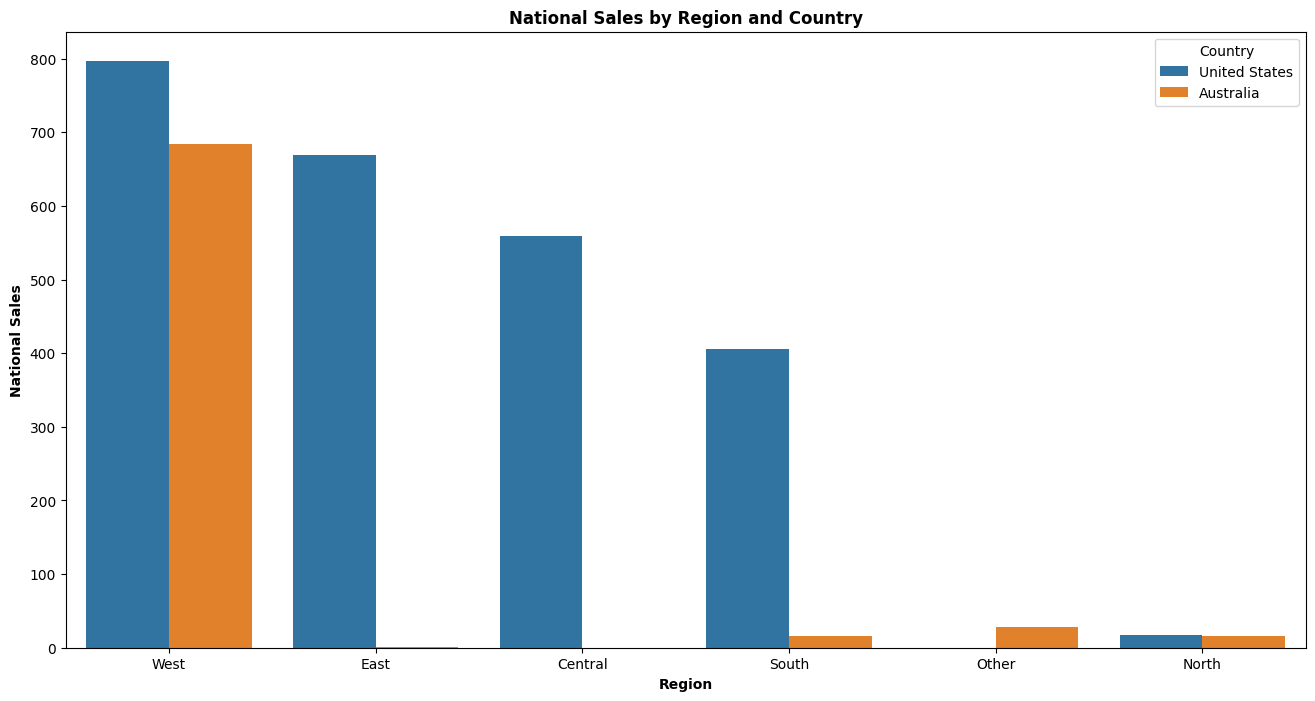

In [35]:
#Tạo Bar Chart 
National_Sales=df.groupby(['Region','Country'])['National Sales'].sum().reset_index().sort_values(by='National Sales', ascending=False)
National_Sales
plt.figure(figsize=(16, 8))
sns.barplot(data=National_Sales, x='Region', y='National Sales',hue='Country') #Vẽ biểu đồ cột, phân nhóm theo Country trong từng Region
plt.title('National Sales by Region and Country',fontweight='bold')
plt.xlabel('Region',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

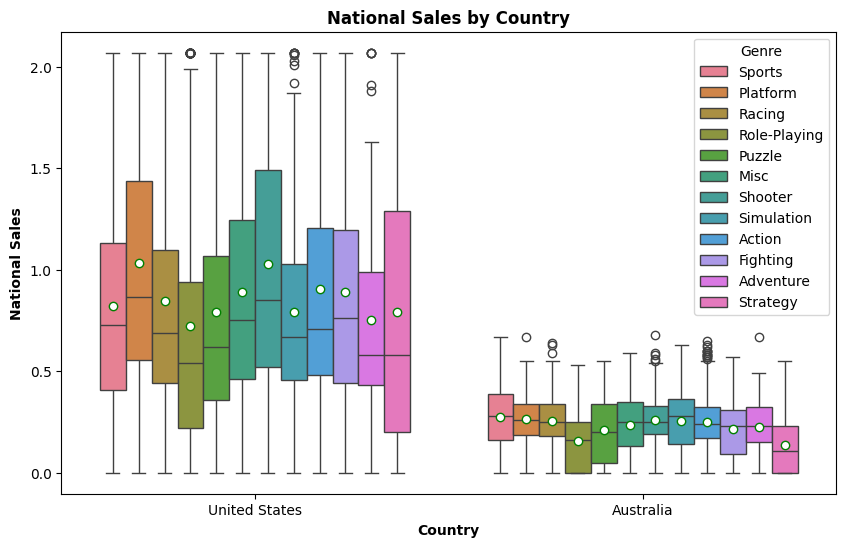

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='National Sales', data=df,showmeans=True,hue='Genre',meanprops={"marker":"o"
                                                                                   ,"markerfacecolor":"white"
                                                                                   ,"markersize":"6"
                                                                                 ,"markeredgecolor":"green"})

plt.title('National Sales by Country',fontweight='bold')
plt.xlabel('Country',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

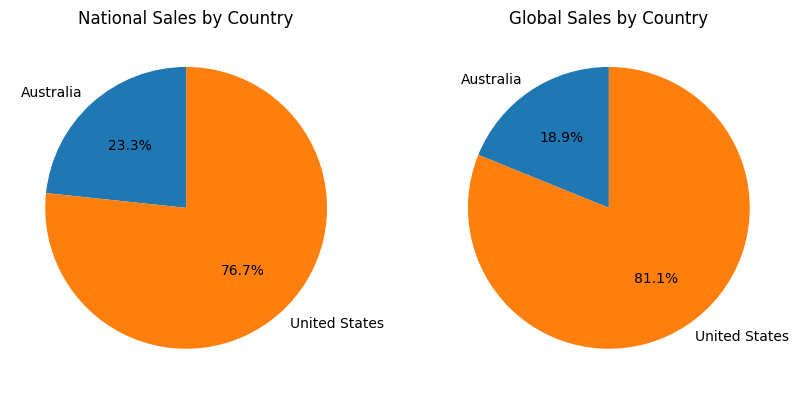

In [37]:
#create a pie Chart
Sales=df.groupby(['Country'])[['National Sales','Global Sales']].sum().reset_index()
Country=Sales['Country']
National_Sales=Sales['National Sales']
Global_Sales=Sales['Global Sales']

fig, axs = plt.subplots(1, 2, figsize=(10, 7))

axs[0].pie(National_Sales, labels=Country, autopct='%1.1f%%', startangle=90)
axs[0].set_title('National Sales by Country')

axs[1].pie(Global_Sales, labels=Country, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Global Sales by Country')

plt.show()

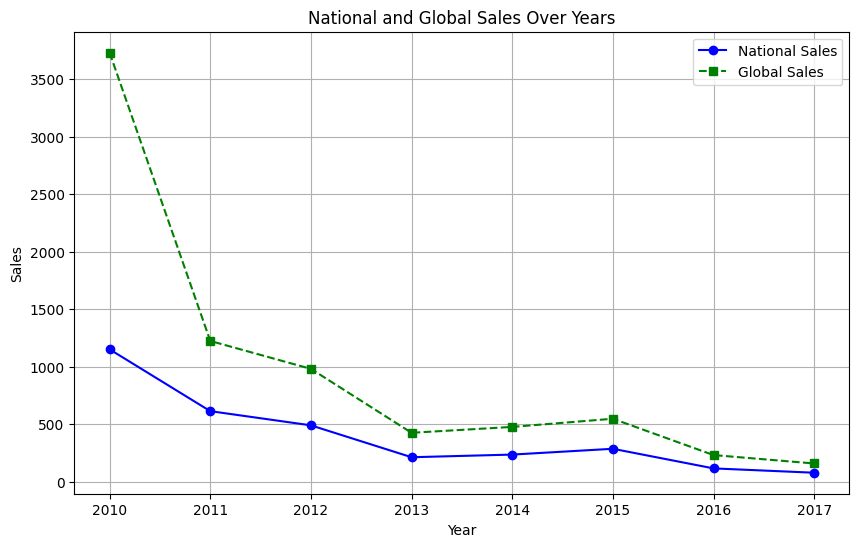

In [45]:
# Create a line chart
sales_by_year = df.groupby('Year')[['National Sales', 'Global Sales']].sum().reset_index()
plt.figure(figsize=(10, 6))

# Line for National Sales
plt.plot(sales_by_year['Year'], sales_by_year['National Sales'],
         marker='o', linestyle='-', color='b', label='National Sales')

# Vẽ đường doanh số toàn cầu
plt.plot(sales_by_year['Year'], sales_by_year['Global Sales'],
         marker='s', linestyle='--', color='g', label='Global Sales')

# Adding titles and labels
plt.title('National and Global Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()

# Display the line chart
plt.grid(True)
plt.show()

Dự báo xu hướng

In [49]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ----------- ---------------------------- 3.1/11.1 MB 15.6 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.1 MB 25.3 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 23.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ----- ---------------------------------- 5.5/41.0 MB 29.5 MB/s eta 0:00:02
   ----------- ---------------------------- 11.5/41.0 MB 28.1 MB/s eta 0:00:02
   ------------------ --------------------- 18.6/41.0 MB 30.8 MB/s eta 0:00:01
   --------------------------- ------------ 27.8/41.0 MB 34.1 MB/s eta 0:00:01
   ----------------------------------- ---- 36.4/41.0 MB 36.0 MB/s eta 0:00:01
   ---------------------------------------  40.9/41.0 MB 36.6 MB/s eta 0:00:01
   ---------------------------------------- 41.0/41.0 MB 32.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


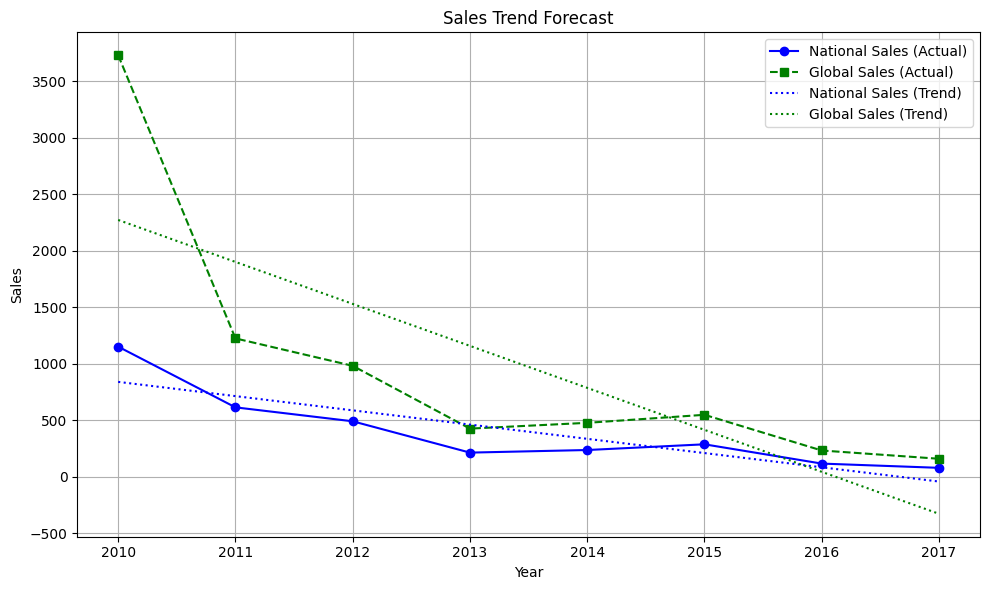

In [56]:
from sklearn.linear_model import LinearRegression
sales_by_year = df.groupby('Year')[['National Sales', 'Global Sales']].sum().reset_index()
model = LinearRegression()

# Biến đầu vào (năm) và mục tiêu (doanh số)
X = sales_by_year['Year'].values.reshape(-1, 1)  # reshape thành ma trận cột
y_national = sales_by_year['National Sales'].values
y_global = sales_by_year['Global Sales'].values

# Huấn luyện mô hình
model.fit(X, y_national)
pred_national = model.predict(X)

model.fit(X, y_global)
pred_global = model.predict(X)
plt.figure(figsize=(10, 6))

# Thực tế
plt.plot(sales_by_year['Year'], y_national, 'bo-', label='National Sales (Actual)')
plt.plot(sales_by_year['Year'], y_global, 'gs--', label='Global Sales (Actual)')

# Dự báo (đường xu hướng)
plt.plot(sales_by_year['Year'], pred_national, 'b:', label='National Sales (Trend)')
plt.plot(sales_by_year['Year'], pred_global, 'g:', label='Global Sales (Trend)')


plt.title('Sales Trend Forecast')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()